In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('playground-series-s3e16 crab age/train.csv')

In [3]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [16]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [20]:
df['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [21]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])

In [4]:
corelation = df.corr()

<AxesSubplot:>

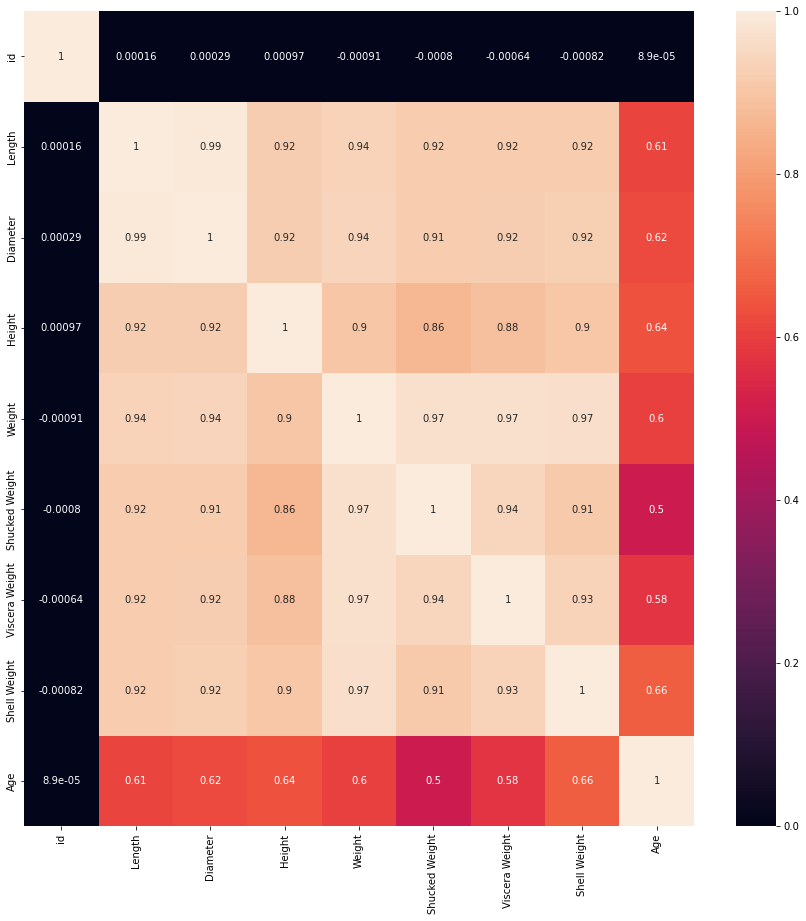

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,ax=ax)

In [105]:
X = df.drop(['Age'],axis=1)
X.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [23]:
Y = df['Age']
Y.head()

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.model_selection import train_test_split

In [108]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

  
print (X_train[0:10, :])

[[ 1.53729277 -0.06951982 -0.79746731 -0.89153707 -0.92702685 -1.09617412
  -1.01002542 -1.27135223 -1.1069797 ]
 [ 0.53748454 -1.28868922  0.41832453  0.42406224  0.15704744  0.64296733
   0.99308903  0.54972272  0.18168222]
 [ 1.11979454 -0.06951982 -1.88299573 -1.73352062 -1.74008257 -1.5228405
  -1.46917759 -1.550347   -1.56947493]
 [-1.1129703   1.14964958  0.93937818  0.95030197  0.5635753   1.01924005
   1.17977728  1.38670703  0.6165068 ]
 [-1.44895074 -1.28868922 -0.3198348  -0.31267337 -0.38498971 -0.67622689
  -0.61142078 -0.49016688 -0.75912004]
 [-0.93918409  1.14964958 -0.18957139  0.16094238 -0.11397113 -0.11741711
  -0.21029332 -0.22639     0.41885926]
 [ 0.58707764  1.14964958 -1.53562664 -1.52302473 -1.33355471 -1.40525527
  -1.43133538 -1.38802277 -1.39949805]
 [-0.63447395  1.14964958  1.37358955  1.58178963  1.24112173  2.00359635
   1.95175842  1.28018175  1.34780267]
 [ 0.08848229  1.14964958 -0.36325594 -0.31267337 -0.52049899 -0.71094253
  -0.56853294 -0.693072

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [109]:
model = LinearRegression()

In [110]:
model.fit(X_train,Y_train)

LinearRegression()

In [111]:
model.score(X_test,Y_test)

0.5404350635074523

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

In [44]:
Y_pred1=model.predict(X_test)

In [45]:
print('MSE: {:.2f}'.format(mean_absolute_error(Y_test, Y_pred1)))
print('R^2 score: {:.2f}'.format(r2_score(Y_test, Y_pred1)))

MSE: 1.51
R^2 score: 0.55


In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
model0 = KNeighborsRegressor()

In [48]:
model0.fit(X_train,Y_train)

KNeighborsRegressor()

In [49]:
model0.score(X_test,Y_test)

0.4970304219736458

In [50]:
# from sklearn.ensemble import AdaBoostRegressor

In [51]:
# model1 = AdaBoostRegressor()

In [52]:
# model1.fit(X_train,Y_train)

AdaBoostRegressor()

In [53]:
# model1.score(X_test,Y_test)

-0.12279280255563951

In [54]:
from sklearn.linear_model import SGDRegressor

In [55]:
model2=SGDRegressor()

In [56]:
model2.fit(X_train,Y_train)

SGDRegressor()

In [57]:
model2.score(X_test,Y_test)

0.5479081008911214

In [58]:
from sklearn import svm

In [59]:
model3 = svm.SVR()

In [60]:
model3.fit(X_train,Y_train)

SVR()

In [61]:
model3.score(X_test,Y_test)

0.5683298418593632

In [62]:
from sklearn.tree import DecisionTreeRegressor  
classifier= DecisionTreeRegressor( random_state=0)  
classifier.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

In [63]:
classifier.score(X_test,Y_test)

0.12886937563050982

In [64]:
from sklearn.ensemble import RandomForestRegressor 

In [65]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [66]:
regr.score(X_test,Y_test)

0.4315386175409325

In [67]:
y_pred3 = model3.predict(X_test)

In [69]:
print('MSE: {:.2f}'.format(mean_absolute_error(Y_test, y_pred3)))
print('R^2 score: {:.2f}'.format(r2_score(Y_test, y_pred3)))

MSE: 1.38
R^2 score: 0.57


In [90]:
test = pd.read_csv('playground-series-s3e16 crab age/test.csv')

In [91]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['Sex']= label_encoder.fit_transform(test['Sex'])

In [92]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [93]:
test.shape

(49368, 9)

In [103]:
test = sc_x.fit_transform(test)

  
print (test[0:10, :])

[[-1.73201572 -0.06021785 -0.94022724 -1.1152488  -0.79876245 -1.17440893
  -1.15350235 -1.19765493 -1.1254916 ]
 [-1.73194555 -0.06021785 -0.5481686  -0.58690972 -0.79876245 -0.62946669
  -0.55233383 -0.65433444 -0.7766346 ]
 [-1.73187539 -1.27809371 -0.11254788 -0.16423845 -0.25680733 -0.70347119
  -0.81502932 -0.42583517 -0.53877755]
 [-1.73180522 -1.27809371  0.80225562 -0.16423845  0.42063656  0.38865586
   0.5792775   0.52878401  0.07965077]
 [-1.73173505 -0.06021785 -0.72241689 -0.74541144 -0.93425123 -0.9254847
  -0.82008116 -0.93361133 -0.95502739]
 [-1.73166488  1.15765801  0.36663491  0.36410063  0.01417022  0.10833578
  -0.24922365  0.22919607  0.37300779]
 [-1.73159471  1.15765801  1.36856256  1.26227706  1.09808045  1.83622879
   1.97863616  2.46848893  1.29272171]
 [-1.73152454 -0.06021785 -0.50460653 -0.58690972 -0.52778489 -0.7539288
  -0.78977014 -0.74573415 -0.78456317]
 [-1.73145437 -1.27809371 -0.02542374  0.15276499 -0.66327367  0.00966311
  -0.35026038  0.1987295

In [94]:
test = sc_x.transform(test)

  
print (test[0:10, :])

[[7.40510000e+04 1.00000000e+00 1.05000000e+00 7.62500000e-01
  2.75000000e-01 8.61824800e+00 3.65708550e+00 1.72931950e+00
  2.72155200e+00]
 [7.40520000e+04 1.00000000e+00 1.16250000e+00 8.87500000e-01
  2.75000000e-01 1.55071765e+01 7.03067600e+00 3.24601775e+00
  3.96893000e+00]
 [7.40530000e+04 2.66389957e-17 1.28750000e+00 9.87500000e-01
  3.25000000e-01 1.45716430e+01 5.55650200e+00 3.88388150e+00
  4.81941500e+00]
 [7.40540000e+04 2.66389957e-17 1.55000000e+00 9.87500000e-01
  3.87500000e-01 2.83778495e+01 1.33809640e+01 6.54873450e+00
  7.03067600e+00]
 [7.40550000e+04 1.00000000e+00 1.11250000e+00 8.50000000e-01
  2.62500000e-01 1.17650425e+01 5.52815250e+00 2.46640650e+00
  3.33106625e+00]
 [7.40560000e+04 2.00000000e+00 1.42500000e+00 1.11250000e+00
  3.50000000e-01 2.48341620e+01 8.73164600e+00 5.71242425e+00
  8.07960750e+00]
 [7.40570000e+04 2.00000000e+00 1.71250000e+00 1.32500000e+00
  4.50000000e-01 4.66774518e+01 2.12337755e+01 1.19634890e+01
  1.13681495e+01]
 [7.40

C:\Users\ashwa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [104]:
test.shape

(49368, 9)

In [96]:
y_predict = model3.predict(test)

In [84]:
sol = pd.read_csv('playground-series-s3e16 crab age/sample_submission.csv')

In [85]:
sol.drop(['Age'],axis=1)

,id
0,74051
1,74052
2,74053
3,74054
4,74055
...,...
49363,123414
49364,123415
49365,123416
49366,123417


In [97]:
sol['Age']=y_predict

In [98]:
test.shape

(49368, 9)

In [99]:
sol.shape

(49368, 2)

In [100]:
df.shape

(74051, 10)

In [101]:
sol.head()

,id,Age
0,74051,11.198102
1,74052,11.198102
2,74053,11.198102
3,74054,11.198102
4,74055,11.198102


In [102]:
sol.to_csv('solution.csv',index=False)